# LABORATORY SESSION - WEEK 4 

### Exeercise 1 

Import the data and draw their histograms.

### Solution 

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the node and edge files
nodes_file_path = r'data/Network-1-NODES.csv'
edges_file_path = r'data/Network-1-EDGES.csv'

# Read the CSV files
nodes_df = pd.read_csv(nodes_file_path) # nodes detaframe
edges_df = pd.read_csv(edges_file_path) # edges dataframe 

In [24]:
nodes_df.head()

,id,person,unit,unit_id,tenure
0,s01,Bruce Banner,Legal,2,22
1,s02,Bucky Barnes,Legal,2,10
2,s03,Carol Danvers,Legal,2,14
3,s04,Clint Barton,Marketing,3,11
4,s05,Donald Blake,PR,4,8


In [25]:
edges_df.head()

,from,to,link,score
0,s01,s02,financial,1
1,s01,s03,financial,2
2,s01,s04,financial,3
3,s01,s05,contract,12
4,s01,s06,financial,2


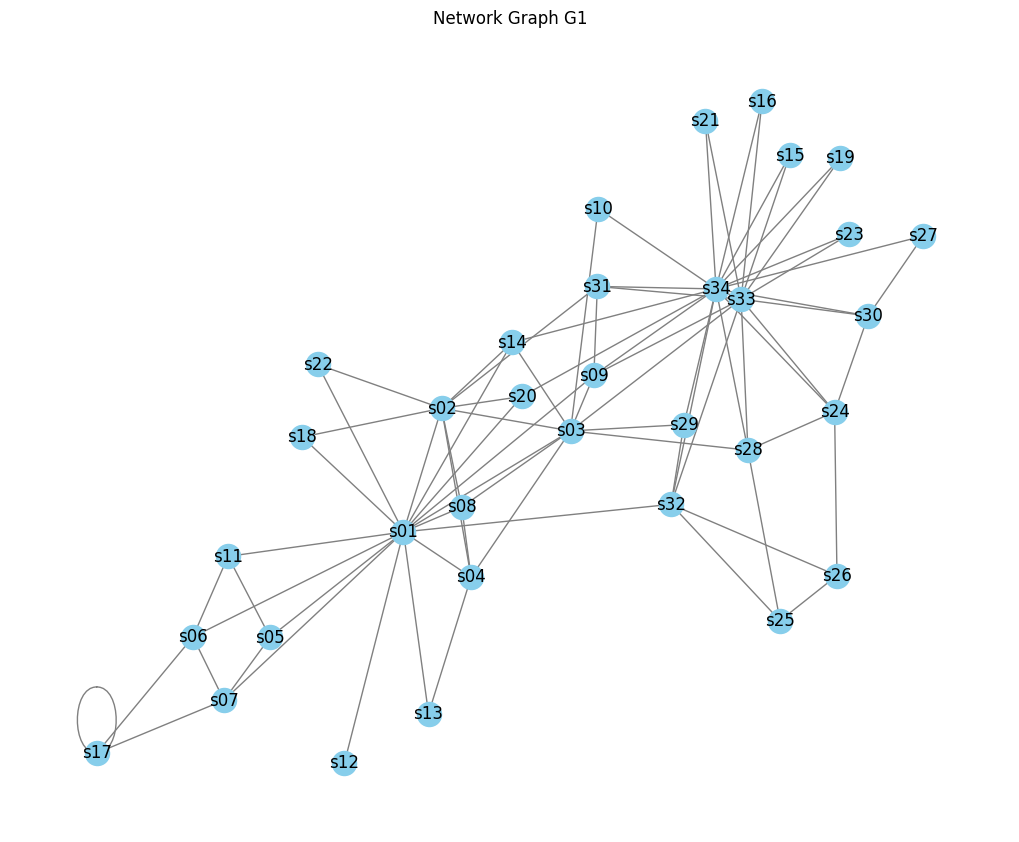

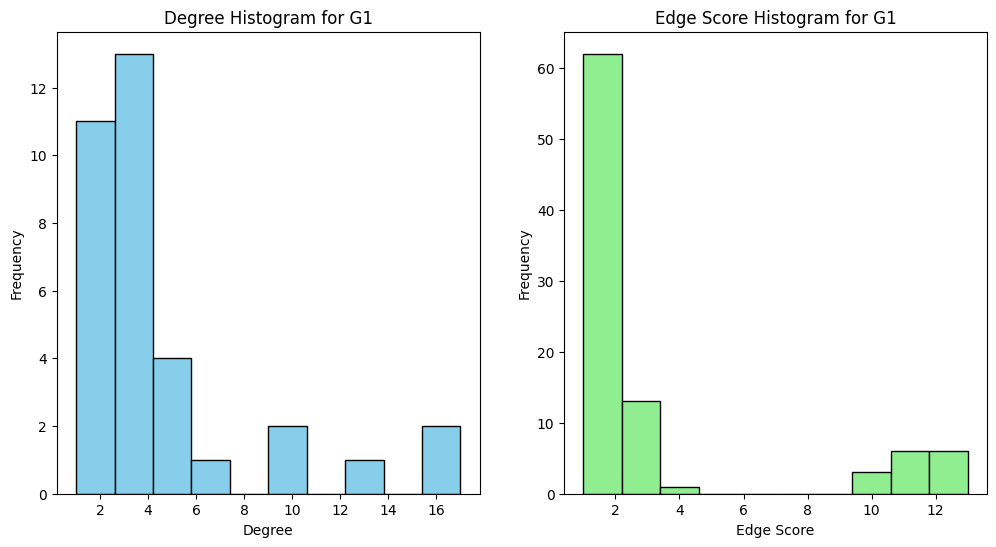

In [26]:
# Initialize an empty graph for G1
G1 = nx.Graph()

# Add nodes with attributes (id, person, unit, unit_id, tenure)
for _, row in nodes_df.iterrows():
    G1.add_node(row['id'], person=row['person'], unit=row['unit'], unit_id=row['unit_id'], tenure=row['tenure'])

# Add edges with attributes (from, to, link, score)
for _, row in edges_df.iterrows():
    G1.add_edge(row['from'], row['to'], link=row['link'], score=row['score'])

# Plot the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G1)  # Choose layout; spring_layout for a force-directed layout
nx.draw(G1, pos, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")
plt.title("Network Graph G1")
plt.show()

# Calculate and plot the degree histogram
degrees1 = [degree for node, degree in G1.degree()]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees1, bins=10, color='skyblue', edgecolor='black')
plt.title("Degree Histogram for G1")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Plot edge score histogram if available
weights1 = edges_df['score']
plt.subplot(1, 2, 2)
plt.hist(weights1, bins=10, color='lightgreen', edgecolor='black')
plt.title("Edge Score Histogram for G1")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")
plt.show()


In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Path to the edges text file
edges_file_path = r'data/budapest_connectome_3.0_209_0_median.csv'

# Read the edges from the text file
# Assuming that the file is space-separated (adjust delimiter if necessary)
edges_df = pd.read_csv(edges_file_path,  delimiter=';')
edges_df.head()

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med nof)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,25.0
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,5.0
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,8.0
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,6.0
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,3.0


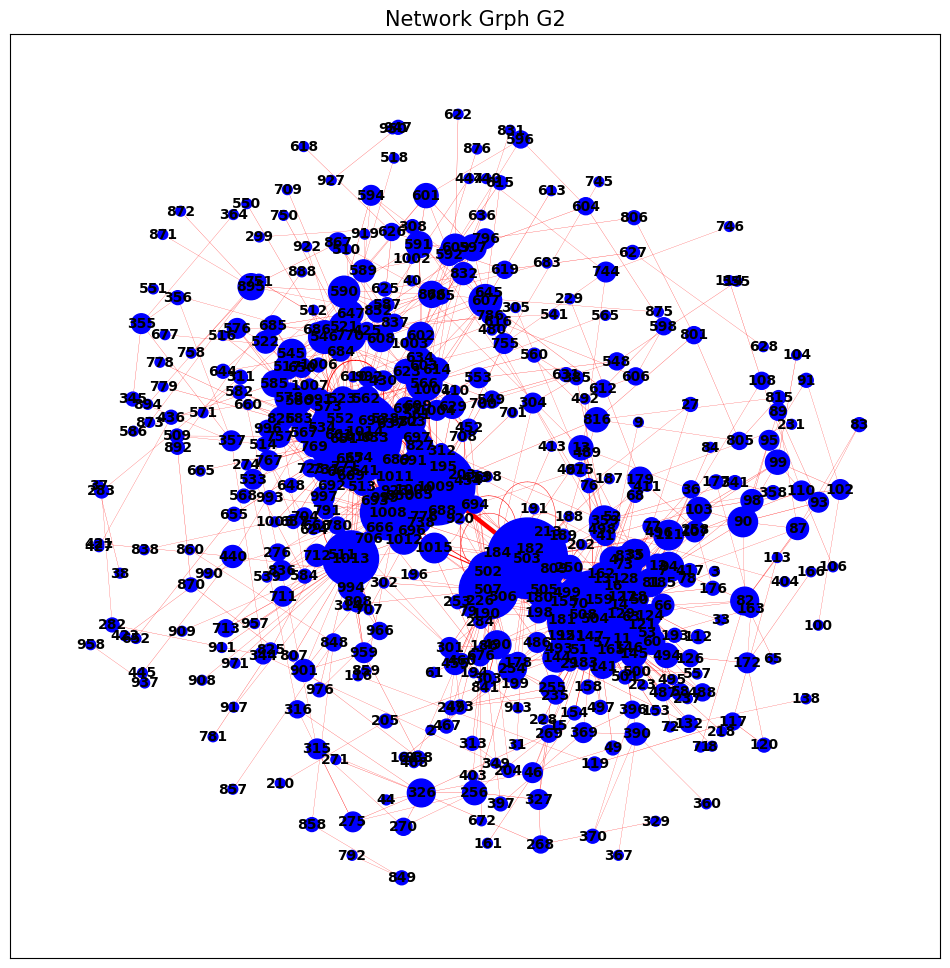

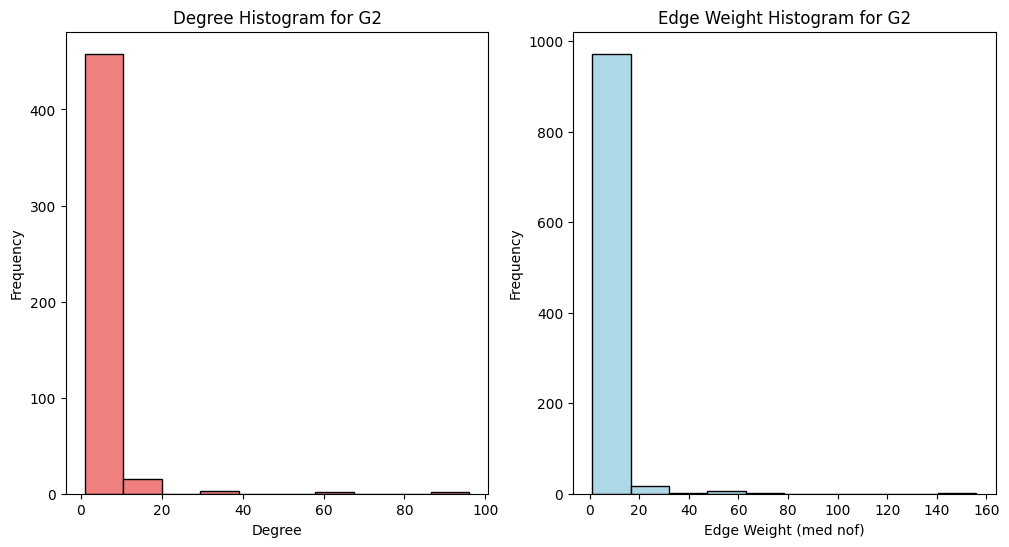

In [28]:
# Initialize an empty graph for G2
G2 = nx.Graph()

# initialize figure 
plt.figure(figsize=(12, 12))

# Add edges to the graph with weights
for index, row in edges_df.iterrows():
    # Add the edge with weight (med nof)
    G2.add_edge(row['id node1'], row['id node2'], weight=row['edge weight(med nof)'])

# Generate layout for the network (spring layout works well)
pos = nx.spring_layout(G2, k=0.3, seed=42)

# Draw nodes with size based on degree (number of connections)
node_sizes = [G2.degree(n) * 50 for n in G2.nodes()]  # Size based on degree
nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color='blue')

# Draw edges with width based on weight
weights = [G2[u][v]['weight'] for u, v in G2.edges()]
nx.draw_networkx_edges(G2, pos, width=[0.1 + w * 0.02 for w in weights], edge_color='red')

# Draw node labels (using names from the 'name node1' and 'name node2' columns)
# Create a dictionary of node IDs to node names
node_labels = pd.Series(edges_df['id node1'].values, index=edges_df['id node1']).to_dict()
node_labels.update(pd.Series(edges_df['id node2'].values, index=edges_df['id node2']).to_dict())

# Add labels
nx.draw_networkx_labels(G2, pos, labels=node_labels, font_size=10, font_weight='bold')

# Add a title to the plot
plt.title("Network Grph G2", size=15)

# Display the plot
plt.show()

# Calculate and plot the degree histogram
degrees2 = [degree for node, degree in G2.degree()]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees2, bins=10, color='lightcoral', edgecolor='black')
plt.title("Degree Histogram for G2")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Plot edge weight histogram
weights2 = edges_df['edge weight(med nof)']
plt.subplot(1, 2, 2)
plt.hist(weights2, bins=10, color='lightblue', edgecolor='black')
plt.title("Edge Weight Histogram for G2")
plt.xlabel("Edge Weight (med nof)")
plt.ylabel("Frequency")
plt.show()


### Exercise 2

Correct the scale of the plot's axes to double logarithmic.

### Solution 

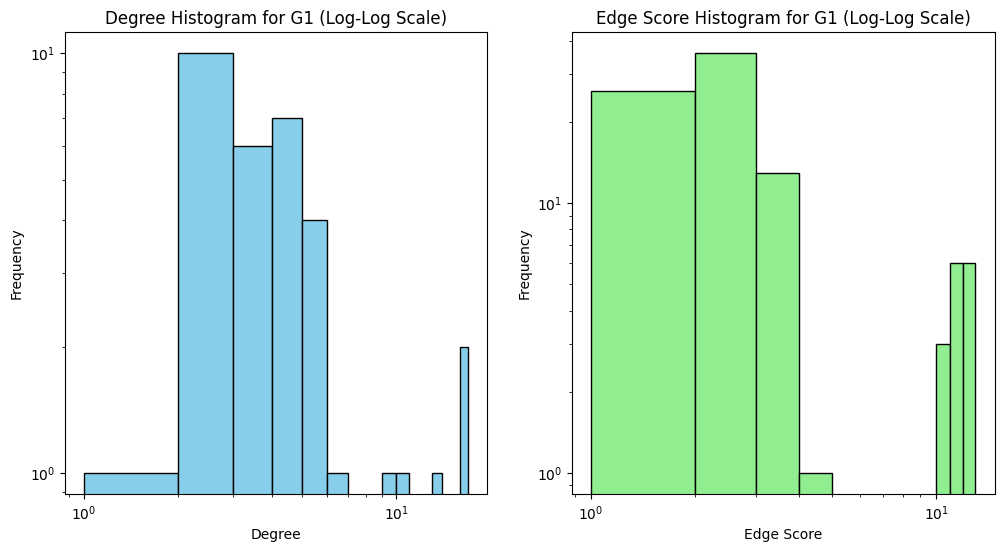

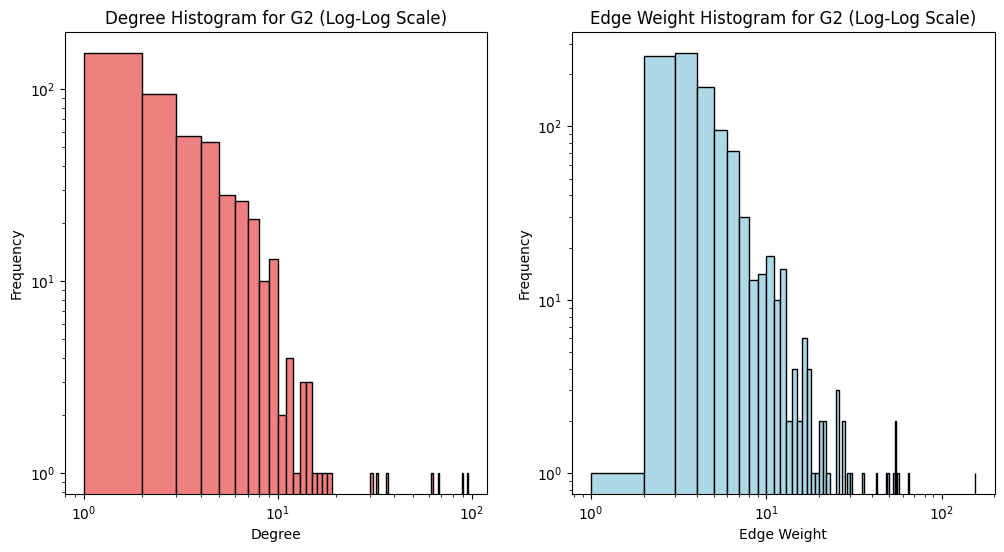

In [31]:
import matplotlib.pyplot as plt

# Degree histogram for G1 in log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G1
plt.subplot(1, 2, 1)
plt.hist(degrees1, bins=range(1, max(degrees1) + 1), color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G1 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G1
plt.subplot(1, 2, 2)
plt.hist(weights1, bins=range(int(min(weights1)), int(max(weights1)) + 1), color='lightgreen', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Score Histogram for G1 (Log-Log Scale)")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")
plt.show()

# Degree and edge weight histograms for G2 in log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G2
plt.subplot(1, 2, 1)
plt.hist(degrees2, bins=range(1, max(degrees2) + 1), color='lightcoral', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G2 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G2
plt.subplot(1, 2, 2)
plt.hist(weights2, bins=range(int(min(weights2)), int(max(weights2)) + 1), color='lightblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Weight Histogram for G2 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.show()


### Exercise 3

Apply logarithmic binning as well.

### Solution

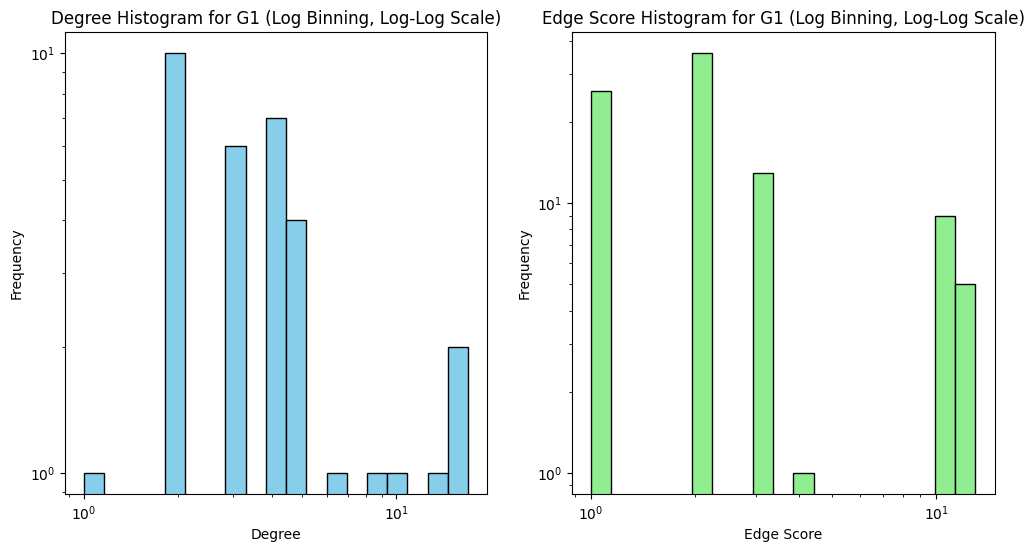

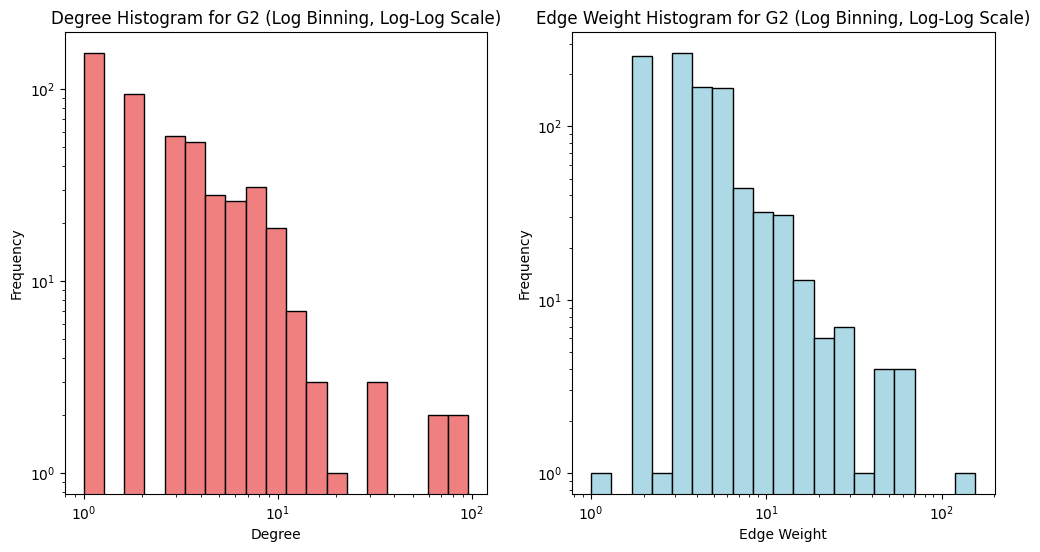

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to create logarithmic bins
def log_bins(data, num_bins=20):
    min_val = min(data)
    max_val = max(data)
    bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins)
    return bins

# Degree histogram for G1 with logarithmic binning and log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G1
plt.subplot(1, 2, 1)
log_bins_degrees1 = log_bins(degrees1)
plt.hist(degrees1, bins=log_bins_degrees1, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G1 (Log Binning, Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G1
plt.subplot(1, 2, 2)
log_bins_weights1 = log_bins(weights1)
plt.hist(weights1, bins=log_bins_weights1, color='lightgreen', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Score Histogram for G1 (Log Binning, Log-Log Scale)")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")
plt.show()

# Degree and edge weight histograms for G2 with logarithmic binning and log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G2
plt.subplot(1, 2, 1)
log_bins_degrees2 = log_bins(degrees2)
plt.hist(degrees2, bins=log_bins_degrees2, color='lightcoral', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G2 (Log Binning, Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G2
plt.subplot(1, 2, 2)
log_bins_weights2 = log_bins(weights2)
plt.hist(weights2, bins=log_bins_weights2, color='lightblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Weight Histogram for G2 (Log Binning, Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.show()


### Exercise 4 

Compute and draw the survival function.

### Solution 

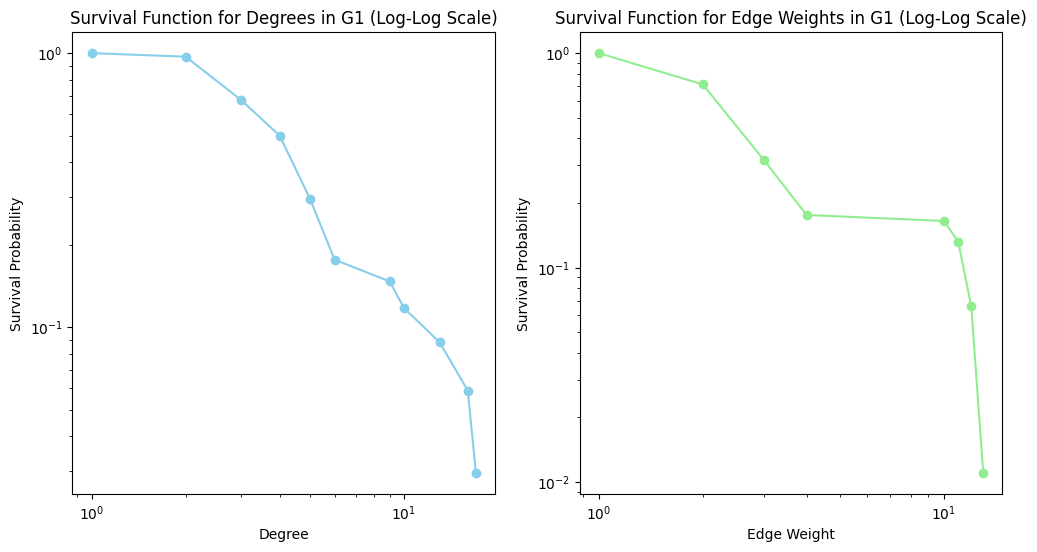

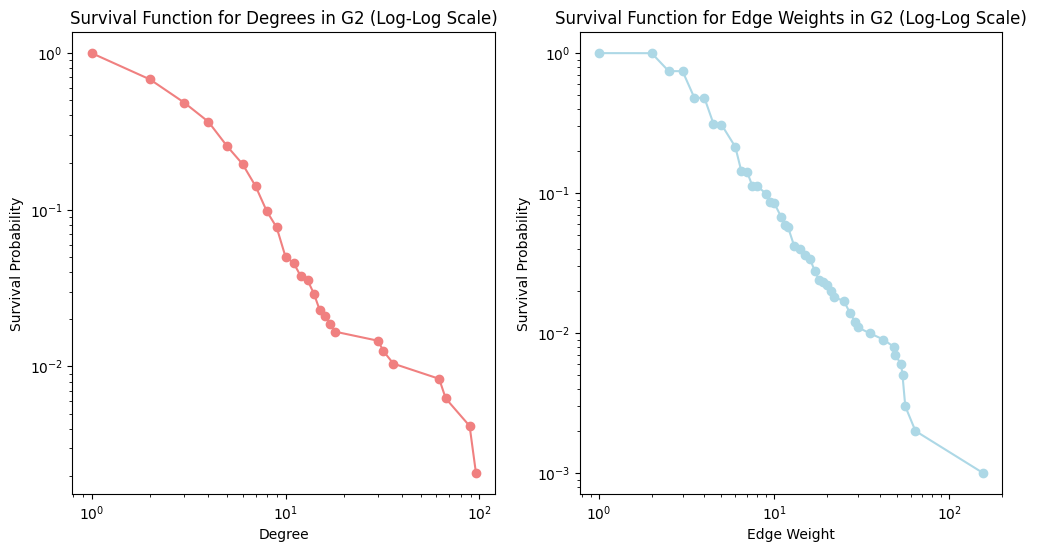

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute survival function
def survival_function(data):
    values, counts = np.unique(data, return_counts=True)
    cumsum = np.cumsum(counts[::-1])[::-1]  # Reverse cumulative sum
    survival_prob = cumsum / cumsum[0]  # Normalize to get probabilities
    return values, survival_prob

# Compute and plot survival functions for G1

plt.figure(figsize=(12, 6))

# Degree survival function for G1
plt.subplot(1, 2, 1)
values_degrees1, survival_degrees1 = survival_function(degrees1)
plt.plot(values_degrees1, survival_degrees1, marker='o', linestyle='-', color='skyblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Degrees in G1 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")

# Edge weight survival function for G1
plt.subplot(1, 2, 2)
values_weights1, survival_weights1 = survival_function(weights1)
plt.plot(values_weights1, survival_weights1, marker='o', linestyle='-', color='lightgreen')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Edge Weights in G1 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.show()

# Compute and plot survival functions for G2

plt.figure(figsize=(12, 6))

# Degree survival function for G2
plt.subplot(1, 2, 1)
values_degrees2, survival_degrees2 = survival_function(degrees2)
plt.plot(values_degrees2, survival_degrees2, marker='o', linestyle='-', color='lightcoral')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Degrees in G2 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")

# Edge weight survival function for G2
plt.subplot(1, 2, 2)
values_weights2, survival_weights2 = survival_function(weights2)
plt.plot(values_weights2, survival_weights2, marker='o', linestyle='-', color='lightblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Edge Weights in G2 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.show()


### Exercise 5 

Which chart is the most readable? Which one is the most robust to noise?

### Solution 

The bigger the network is the better the readability is, in this case. Same for robustness to noise.

### Exercise 6

Apply linear regression to the priviouse plots to compute the parameter $\alpha$ estimator.

### Solution

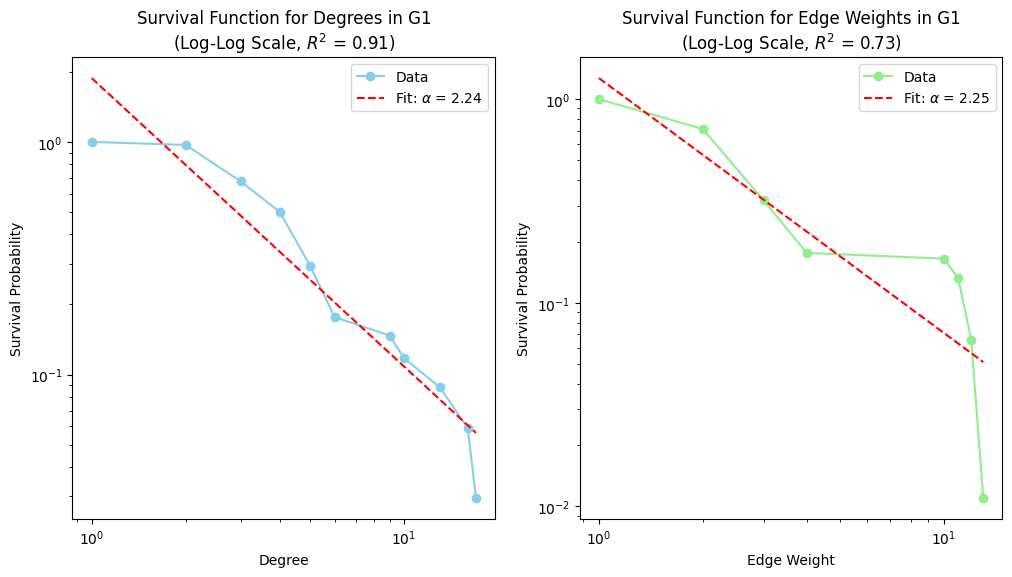

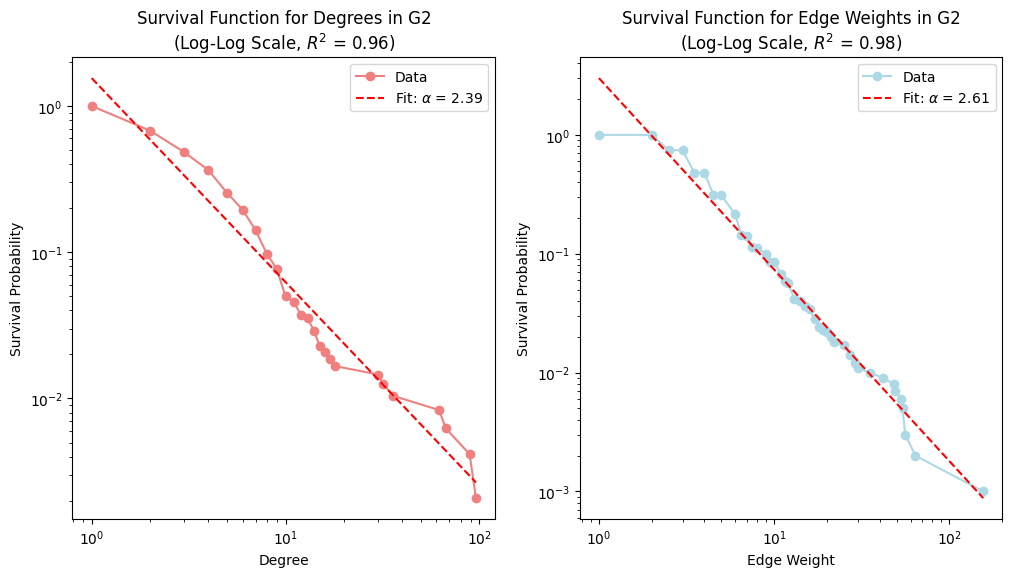

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to compute survival function
def survival_function(data):
    values, counts = np.unique(data, return_counts=True)
    cumsum = np.cumsum(counts[::-1])[::-1]  # Reverse cumulative sum
    survival_prob = cumsum / cumsum[0]  # Normalize to get probabilities
    return values, survival_prob

# Function to perform linear regression on log-log data and compute alpha
def estimate_alpha(values, survival_prob):
    log_values = np.log(values)
    log_survival_prob = np.log(survival_prob)
    slope, intercept, r_value, p_value, std_err = linregress(log_values, log_survival_prob)
    alpha = 1 - slope  # Compute alpha from the slope
    return alpha, slope, intercept, r_value**2

# Plot and estimate alpha for G1
plt.figure(figsize=(12, 6))

# Degree survival function and linear regression for G1
plt.subplot(1, 2, 1)
values_degrees1, survival_degrees1 = survival_function(degrees1)
plt.plot(values_degrees1, survival_degrees1, marker='o', linestyle='-', color='skyblue', label='Data')
alpha_degrees1, slope1, intercept1, r_squared1 = estimate_alpha(values_degrees1, survival_degrees1)
plt.plot(values_degrees1, np.exp(slope1 * np.log(values_degrees1) + intercept1), 'r--', label=f'Fit: $\\alpha$ = {alpha_degrees1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Degrees in G1\n(Log-Log Scale, $R^2$ = {r_squared1:.2f})")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")
plt.legend()

# Edge weight survival function and linear regression for G1
plt.subplot(1, 2, 2)
values_weights1, survival_weights1 = survival_function(weights1)
plt.plot(values_weights1, survival_weights1, marker='o', linestyle='-', color='lightgreen', label='Data')
alpha_weights1, slope2, intercept2, r_squared2 = estimate_alpha(values_weights1, survival_weights1)
plt.plot(values_weights1, np.exp(slope2 * np.log(values_weights1) + intercept2), 'r--', label=f'Fit: $\\alpha$ = {alpha_weights1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Edge Weights in G1\n(Log-Log Scale, $R^2$ = {r_squared2:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

# Plot and estimate alpha for G2
plt.figure(figsize=(12, 6))

# Degree survival function and linear regression for G2
plt.subplot(1, 2, 1)
values_degrees2, survival_degrees2 = survival_function(degrees2)
plt.plot(values_degrees2, survival_degrees2, marker='o', linestyle='-', color='lightcoral', label='Data')
alpha_degrees2, slope3, intercept3, r_squared3 = estimate_alpha(values_degrees2, survival_degrees2)
plt.plot(values_degrees2, np.exp(slope3 * np.log(values_degrees2) + intercept3), 'r--', label=f'Fit: $\\alpha$ = {alpha_degrees2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Degrees in G2\n(Log-Log Scale, $R^2$ = {r_squared3:.2f})")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")
plt.legend()

# Edge weight survival function and linear regression for G2
plt.subplot(1, 2, 2)
values_weights2, survival_weights2 = survival_function(weights2)
plt.plot(values_weights2, survival_weights2, marker='o', linestyle='-', color='lightblue', label='Data')
alpha_weights2, slope4, intercept4, r_squared4 = estimate_alpha(values_weights2, survival_weights2)
plt.plot(values_weights2, np.exp(slope4 * np.log(values_weights2) + intercept4), 'r--', label=f'Fit: $\\alpha$ = {alpha_weights2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Edge Weights in G2\n(Log-Log Scale, $R^2$ = {r_squared4:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


### Exercise 7

Compute MLE estimator for parameter alpha with known parameter $x_{min}$ assuminng the following distribution:

$$ \frac{\alpha - 1}{x_{min}} (\frac{x}{x_{min}})^{-\alpha}$$

### Solution

### Step 1: Log-Likelihood Function

Given a sample $( x_1, x_2, \ldots, x_n )$ where each $ x_i \geq x_{\text{min}} $, the probability density function (PDF) for the power-law distribution is:

$$
f(x) = \frac{\alpha - 1}{x_{\text{min}}} \left(\frac{x}{x_{\text{min}}}\right)^{-\alpha}
$$

The log-likelihood function for $\alpha$ is then given by:

$$
\log L(\alpha) = \sum_{i=1}^n \log \left( \frac{\alpha - 1}{x_{\text{min}}} \left( \frac{x_i}{x_{\text{min}}} \right)^{-\alpha} \right)
$$

Expanding the logarithm terms, we get:

$$
\log L(\alpha) = n \log (\alpha - 1) - n \log (x_{\text{min}}) - \alpha \sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right)
$$

### Step 2: Taking the Derivative and Solving for $\alpha$

To find the MLE for $\alpha$, we take the derivative of $\log L(\alpha)$ with respect to $\alpha$ and set it to zero:

$$
\frac{d}{d\alpha} \log L(\alpha) = \frac{n}{\alpha - 1} - \sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right) = 0
$$

Rearranging, we solve for $\alpha$:

$$
\alpha = 1 + \frac{n}{\sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right)}
$$

This gives the MLE estimator for \(\alpha\).



MLE estimator for alpha: 1.7305


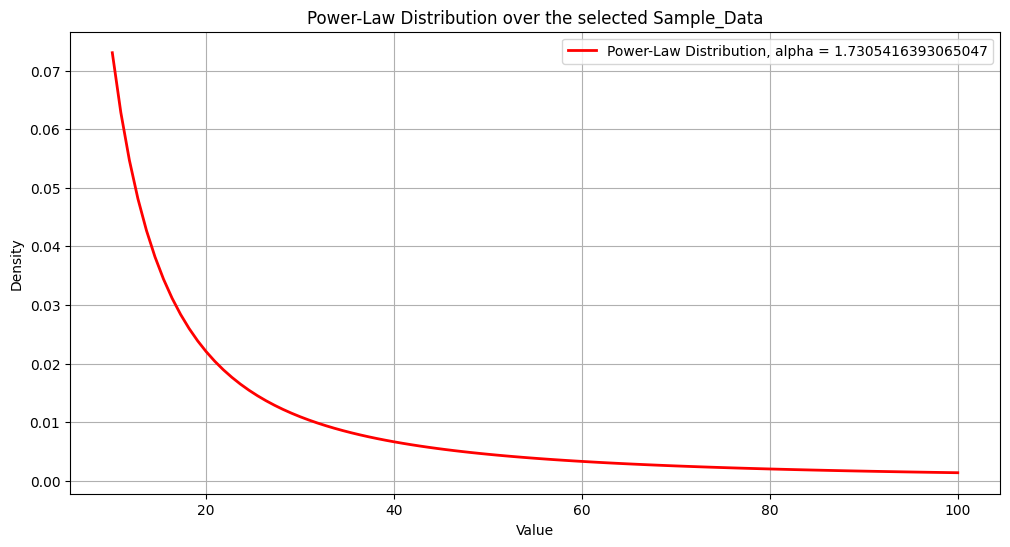

: 

In [42]:
import numpy as np

# Inputs
sample_data = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]  # Example data
known_x_min = 10  # Minimum value

# Sample data and known x_min
data = np.array([sample_data])  # Replace with actual data
x_min = known_x_min  # Replace with the known value of x_min

# Filter the data to include only values >= x_min
filtered_data = data[data >= x_min]

# Calculate the MLE for alpha
n = len(filtered_data)
alpha_mle = 1 + n / np.sum(np.log(filtered_data / x_min))

print(f"MLE estimator for alpha: {alpha_mle:.4f}")

# Plotting the distribution
plt.figure(figsize=(12, 6))

# Overlay the fitted power-law distribution
x = np.linspace(x_min, max(filtered_data), 100)
power_law_distribution = (alpha_mle - 1) / x_min * (x / x_min) ** (-alpha_mle)

# Normalize the distribution for proper overlay
plt.plot(x, power_law_distribution, color='red', linewidth=2, label=f'Power-Law Distribution, alpha = {alpha_mle}')

# Labels and title
plt.title('Power-Law Distribution over the selected Sample_Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
#plt.xscale('log')  # Optional: Log scale for x-axis
#plt.yscale('log')  # Optional: Log scale for y-axis
plt.grid()
plt.show()


### Exercise 8

What happen if we do not know the parameter $x_{min}$?

### Solution

### Probelm 1

Compute MLE estimator for parameter alpha with unknown parameter $x_{min}$ assuminng the following distribution:

$$ \frac{\alpha - 1}{x_{min}} (\frac{x}{x_{min}})^{-\alpha}$$

### Solution